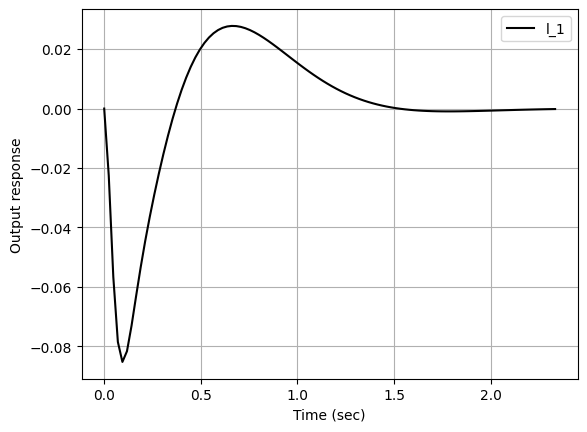

In [11]:
import numpy as np
from scipy.signal import place_poles
import matplotlib.pyplot as plt
from scipy.signal import lti, impulse

# Define the system matrices
A = np.array([[0, 0, 1, -1, 0],
              [0, 0, 1, 0, 0],
              [-10, 0, -2, 2, 0],
              [720, -660, 12, -12, 0],
              [1, 0, 0, 0, 0]])
b1 = np.array([[0], [0], [0.00333], [-0.02], [0]])
b2 = np.array([[0], [-1], [0], [0], [0]])
b3 = np.array([[0], [0], [0], [0], [1]])
pd = np.array([-5, -25+25j, -25-25j, -3+3j, -3-3j])

# Pole placement
k = place_poles(A, b1, pd).gain_matrix

# Closed loop system
Acl = A - b1.dot(k)
Bcl = 0.1 * b2
C = np.array([1, 0, 0, 0, 0])
D = 0
ld = 0.1
active_fb = lti(Acl, Bcl, C, D)

# Simulation
t, y = impulse(active_fb)

# Since the state x is not directly returned, we need to compute it if necessary
# For example, if you need to plot state variables, you might need to simulate the system with another function

# Plot the result
plt.plot(t, y, 'k', label='l_1')  # Adjust the plotting according to the returned values
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Output response')
plt.legend()
plt.show()
